# 국공립 어린이집 최적 입지 선정 (서울시 빅데이터 캠퍼스 공모전)

### **데이터 전처리**

#### **데이터 목록**

서울시 어린이집 data: https://data.seoul.go.kr/dataList/datasetView.do?infId=OA-242&srvType=S&serviceKind=1&currentPageNo=1
- 서울시 열린 데이터 광장 / 서울시 보육시설(어린이집)

우편번호 주소 data: https://www.epost.go.kr/search/zipcode/areacdAddressDown.jsp
- 우체국 우편번호 DB

인구 data: https://www.mois.go.kr/frt/a01/frtMain.do
- 행안부 인구 데이터 + 서울시 빅데이터 캠퍼스 인구 데이터

좌표 data
- 어린이집 데이터에 좌표 프로그램 이용하여 경도와 위도를 추가

공시지가 data: 공공 데이터 포털 OPEN API
- 개별 공시지가 정보서비스

실거래가 data: 공공 데이터 포털 OPEN API
- 개별 실거래가 정보서비스(아파트, 연립주택)

#### **데이터 전처리 코딩**

##### [어린이집 데이터: 행정동 주소, 위도, 경도 추가]

In [2]:
### 구주소를 행정동으로 변환 ###
import pandas as pd
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
## 데이터 load ##
all_data = pd.read_csv("d:/project_data/all_data2.csv", encoding="euc-kr", index_col=0)
all_ad = pd.read_csv("d:/project_data/address_ad.txt", sep="|", encoding="cp949", header=None)
all_data.head() # 초기 상태의 인구 데이터는 X, Y, old_add가 존재하지 않음.

,Seoul,Gue,Name,Type,Open,Code,Add,Room,Howbig,Playground,Worker,Max,Now,When,X,Y,old_add
0,서울특별시,강남구,동원어린이집,직장,정상,6303,개포로15길 29,7,309,1,11,100,26,2016-10-25,127.045769,37.480290,개포동 1239-4
1,서울특별시,강남구,은가비어린이집,가정,정상,6312,논현로14길 20,4,60,0,4,19,11,2016-11-08,127.048901,37.475792,개포동 1223-1
2,서울특별시,강남구,푸른어린이집,국공립,정상,6372,자곡로7길 8-1,5,381,2,13,74,72,1993-08-25,127.099793,37.473560,자곡동 440-33
3,서울특별시,강남구,일원어린이집,국공립,정상,6350,광평로3길 21,6,330,2,16,95,73,1996-10-24,127.077957,37.484096,일원동 730
4,서울특별시,강남구,명화어린이집,국공립,정상,6347,광평로51길 49,7,210,1,13,86,64,1993-01-13,127.100194,37.491044,수서동 707


In [24]:
all_ad.head()

,0,1,2,3,4,5,6,7,8
0,1111010100100010000030843,1.111052e+09,청운효자동,3046,NaN,NaN,청운벽산빌리지,청운벽산빌리지,1
1,1111010100100030000030936,1.111052e+09,청운효자동,3046,NaN,NaN,인텔빌라,인텔빌라,1
2,1111010100100030065030970,1.111052e+09,청운효자동,3046,NaN,NaN,NaN,윤동주문학관,0
3,1111010100100030150030938,1.111052e+09,청운효자동,3046,NaN,NaN,인텔빌라,인텔빌라,1
4,1111010100100040001000001,1.111052e+09,청운효자동,3046,NaN,NaN,청운동 파라디아 아델하우스,청운동 파라디아 아델하우스,1


In [25]:
# 휴지 상태 제거 #
all_data = all_data[all_data['Open'] == '정상']
all_data['Code'] = '0' + all_data['Code'].astype(np.str)

# 중복 행 제거 #
all_ad[3] = '0' + all_ad[3].astype(np.str) # 0 추가
idx = all_ad[3].duplicated()
all_ad = all_ad[idx==False]

# 구주소를 행정동 주소로 변환 ##
for i in range(len(all_data['old_add'])):
    try:
        all_data['old_add'].iloc[i] = all_ad[2][all_ad[3] == all_data['Code'].iloc[i]].iloc[0]
#         print(all_data['old_add'].iloc[i])
    except: 
#         print("error: ", all_data['old_add'].iloc[i])
        continue

# all_data.to_csv("d:/project_data/all_data3.csv", encoding="euc-kr")
all_data.head()

,Seoul,Gue,Name,Type,Open,Code,Add,Room,Howbig,Playground,Worker,Max,Now,When,X,Y,old_add
0,서울특별시,강남구,동원어린이집,직장,정상,06303,개포로15길 29,7,309,1,11,100,26,2016-10-25,127.045769,37.480290,개포4동
1,서울특별시,강남구,은가비어린이집,가정,정상,06312,논현로14길 20,4,60,0,4,19,11,2016-11-08,127.048901,37.475792,개포4동
2,서울특별시,강남구,푸른어린이집,국공립,정상,06372,자곡로7길 8-1,5,381,2,13,74,72,1993-08-25,127.099793,37.473560,세곡동
3,서울특별시,강남구,일원어린이집,국공립,정상,06350,광평로3길 21,6,330,2,16,95,73,1996-10-24,127.077957,37.484096,일원본동
4,서울특별시,강남구,명화어린이집,국공립,정상,06347,광평로51길 49,7,210,1,13,86,64,1993-01-13,127.100194,37.491044,수서동


##### [인구 데이터: 동별 전처리]

In [1]:
# 파일 뽑아오기
# 파일 행값이 다른 부분까지 짤라서 저장.
# 2010 - 2012 , 2012 - 2014도 같은 방법으로 
def openFile01():
    ## 인구 합계 동별, 월별 추출 함수 ##
    global data_all
    data01 = pd.read_csv('data/2014/19.csv',encoding='cp949') 
    data01.columns=["0","2","3","4","5","6","7","8","9"]
    data02=data01[['0','3']]
    data02["City"]=data02['0']
    for i in range(len(data02)):
        data02['City'].values[i] = data02['0'].values[i][:5]
    data03=data02[data02['City']=='서울특별시']
    data04 =data03[['0','3']]
    data_all= data04
    for i in range(20,58):
        data01 = pd.read_csv('2014/'+str(i)+'.csv',encoding='cp949') 
        data01.columns=["0","2","3","4","5","6","7","8","9"]
        data02=data01[['0','3']]
        data02["City"]=data02['0']
        for i in range(len(data02)):
            data02['City'].values[i] = data02['0'].values[i][:5]
        data03=data02[data02['City']=='서울특별시']
#         print(data03)
        data04 =data03[['3']]
        data_all = pd.concat((data_all, data04), axis=1)
        
    # 결과물 저장 #
#     return data_all.to_csv('data/data_people_2014.csv',encoding='cp949',index=False)
# openFile01()

In [4]:
data= pd.read_csv('data/data_people_2010.csv',encoding='cp949')

# index로 검사해서 합치기.
data.iloc[13]= data.iloc[13][:]+ data.iloc[14][:]
data = data.drop(14)
data01 = pd.read_csv('data/data_people_2012.csv',encoding='cp949')
data03 = pd.merge(data,data01,on='0')

In [5]:
data02 = pd.read_csv('data/data_people_2014.csv',encoding='cp949') 
data02.iloc[423]= data02.iloc[423][:]+ data02.iloc[424][:] # 통합된 행정동 하나로 합치기
data02 = data02.drop(424)
data04 = pd.merge(data03,data02,on='0')

In [6]:
data04.head(2) #2010 ~ 2018 합치기

,0,3_x,3.1_x,3.2_x,3.3_x,3.4_x,3.5_x,3.6_x,3.7_x,3.8_x,...,3.29,3.30,3.31_y,3.32_y,3.33_y,3.34_y,3.35,3.36,3.37,3.38
0,서울특별시 (1100000000),509764,508535,506755,505627,504480,503991,503200,502690,502054,...,429218,425693,422460,418929,416302,413804,411084,408355,405326,401967
1,서울특별시 종로구 (1111000000),6420,6416,6372,6388,6348,6354,6311,6285,6259,...,5157,5126,5101,5051,5027,5005,4979,4914,4884,4832


In [7]:
data04['Gue'] = 0
for i in range(len(data04['0'])):
    data04['Gue'][i] = data04['0'].values[i][6:-12]
data04['Gue01'] = 0
for i in range(len(data04['0'])):
    data04['Gue01'][i] = data04['Gue'][i].split(" ")[1]    
data05 = data04[data04['Gue01']!=""]
data05['0']= data05['Gue']
del data05['Gue']
del data05['Gue01']

In [8]:
# transpose #
data06 = data05.T
data07=data06.reset_index(drop=True)
data07.head()

,2,3,4,5,6,7,8,9,10,11,...,431,432,433,434,435,436,437,438,439,440
0,종로구 청운효자동,종로구 사직동,종로구 삼청동,종로구 부암동,종로구 평창동,종로구 무악동,종로구 교남동,종로구 가회동,종로구 종로1.2.3.4가동,종로구 종로5.6가동,...,강동구 암사제3동,강동구 천호제1동,강동구 천호제2동,강동구 천호제3동,강동구 성내제1동,강동구 성내제2동,강동구 성내제3동,강동구 길동,강동구 둔촌제1동,강동구 둔촌제2동
1,710,446,132,334,724,442,371,202,187,141,...,1336,1481,1731,1262,1345,1229,1331,2596,600,1185
2,709,436,128,331,734,450,375,202,181,140,...,1329,1484,1758,1253,1336,1217,1351,2599,607,1192
3,699,437,127,333,722,449,379,197,171,140,...,1319,1481,1743,1234,1337,1192,1350,2610,603,1215
4,691,442,127,340,722,444,384,198,172,145,...,1295,1456,1757,1230,1339,1181,1345,2639,606,1270


##### [공시지가 데이터: 오픈API -> DataFrame]

In [23]:
# 공시지가 자표파일 불러오기(1만개 단위 )
data=pd.read_csv('data/file_clean01.add',encoding='cp949',sep="\t")
data1=pd.read_csv('data/file_clean02.add',encoding='cp949',sep="\t")
data2=pd.read_csv('data/file_clean03.add',encoding='cp949',sep="\t")
data.head()

,시도명,시군구명,소재지,입력주소,X,Y,CLSS,PNU,주소구분,표준신주소,표준구주소,우편번호
0,서울특별시,종로구,청운동 3-52,서울특별시 종로구 청운동 3-52,126.966514,37.591515,정좌표,공개용버전 미지원,구주소,미지원,미지원,3031.0
1,서울특별시,종로구,청운동 4-15,서울특별시 종로구 청운동 4-15,126.967416,37.590144,정좌표,공개용버전 미지원,구주소,미지원,미지원,3046.0
2,서울특별시,종로구,청운동 8-9,서울특별시 종로구 청운동 8-9,126.966764,37.588967,정좌표,공개용버전 미지원,구주소,미지원,미지원,3031.0
3,서울특별시,종로구,청운동 15-12,서울특별시 종로구 청운동 15-12,126.968597,37.589884,정좌표,공개용버전 미지원,구주소,미지원,미지원,3046.0
4,서울특별시,종로구,청운동 15-13,서울특별시 종로구 청운동 15-13,126.969087,37.589681,정좌표,공개용버전 미지원,구주소,미지원,미지원,3047.0


In [24]:
data01=data[['소재지','X','Y']]
data02=data1[['소재지','X','Y']]
data03=data2[['소재지','X','Y']]
clean_data01=pd.concat([data01,data02,data03],axis=0)
clean_data01.head()

,소재지,X,Y
0,청운동 3-52,126.966514,37.591515
1,청운동 4-15,126.967416,37.590144
2,청운동 8-9,126.966764,37.588967
3,청운동 15-12,126.968597,37.589884
4,청운동 15-13,126.969087,37.589681


In [25]:
house_clean=pd.read_csv('data/house_clean.csv',encoding='cp949') #공시지가 데이터
house_clean.head()

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,용도지역1,용도지역2,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2
0,1,11110,10100,1,3,52,서울특별시,종로구,청운동 3-52,공원,...,자연녹지지역,NaN,공원등,시가지주변 야산지대,급경사지,부정형,세로(불),420000,경기상고,북측 인근
1,2,11110,10100,1,4,15,서울특별시,종로구,청운동 4-15,대,...,제1종일반주거지역,NaN,단독주택,기존 주택지대,완경사지,사다리형,세로(가),3120000,경기상고,북서측 인근
2,3,11110,10100,1,8,9,서울특별시,종로구,청운동 8-9,대,...,제1종일반주거지역,NaN,연립주택,일반 주택지대,급경사지,부정형,세로(가),2920000,청운중학교,서측인근
3,4,11110,10100,1,15,12,서울특별시,종로구,청운동 15-12,대,...,제1종일반주거지역,NaN,단독주택,고급 주택지대,평지,사다리형,소로각지,4320000,청운중학교,북서측인근
4,5,11110,10100,1,15,13,서울특별시,종로구,청운동 15-13,대,...,제1종일반주거지역,NaN,단독주택,고급 주택지대,완경사지,세로장방형,세로(가),3800000,경기상고,북측인근


In [26]:
all_house_clean=pd.merge(house_clean,clean_data01,on='소재지')
all_house_clean01 = all_house_clean.drop(["시도명",'형상명','일련번호','용도지역2','지리적위치2','시군구','읍면동리','지번구분','본번지','부번지'], 1)
check= all_house_clean01['지목']=='대'
all_house_clean02=all_house_clean01[check]
all_house_clean03 = all_house_clean02.drop(['지목','도로교통','지리적위치1'], 1)
check=all_house_clean03['이용상황']!='자연림'
all_house_clean04 = all_house_clean03[check]
all_house_clean04.head()

,시군구명,소재지,면적,용도지역1,이용상황,주위환경,지세명,공시지가,X,Y
1,종로구,청운동 4-15,416.2,제1종일반주거지역,단독주택,기존 주택지대,완경사지,3120000,126.967416,37.590144
2,종로구,청운동 8-9,811.3,제1종일반주거지역,연립주택,일반 주택지대,급경사지,2920000,126.966764,37.588967
3,종로구,청운동 15-12,552.1,제1종일반주거지역,단독주택,고급 주택지대,평지,4320000,126.968597,37.589884
4,종로구,청운동 15-13,538.8,제1종일반주거지역,단독주택,고급 주택지대,완경사지,3800000,126.969087,37.589681
5,종로구,청운동 15-32,251.2,제1종일반주거지역,단독주택,일반 주택지대,완경사지,2900000,126.969266,37.590656


##### [실거래가 연립주택 데이터: 오픈API -> DataFrame]

In [10]:
## 연립주택 지번 주소 구하기 ##
def get_code():
    ## 연립 주택 데이터에서 지번 주소를 구하기 위한 함수 ##
    code = {'종로구': '11110', '중구': '11140', '용산구': '11170', '성동구': '11200', 
            '광진구': '11215', '동대문구': '11230', '중랑구': '11260', '성북구': '11290', 
            '강북구': '11305', '도봉구': '11320', '노원구': '11350', '은평구': '11380', 
            '서대문구': '11410', '마포구': '11440', '양천구': '11470', '강서구': '11500',
            '구로구': '11530', '금천구': '11545', '영등포구': '11560', '동작구': '11590',
            '관악구': '11620', '서초구': '11650', '강남구': '11680', '송파구': '11710', '강동구': '11740'}

    dateList01 = ["201601","201602","201603","201604","201605","201606","201607","201608","201609","201610","201611","201612",
                    "201701","201702","201703","201704","201705","201706","201707","201708","201709","201710","201711","201712",
                    "201801","201802","201803","201804","201805","201806","201807","201808"]
    
    ## URL request --> 받아오기 ## --> 하루 1000트래픽 한정(1 계정당)
    url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcRHTrade?'
    # 서비스키 --> 공공데이터포털에서 오픈API로 받은 인증키를 입력 #
    serviceKey = 'serviceKey=' + "0d8fGluCLeDwmtW310ls9LnNRS582k2fwYEnmtr25HJ8Iv%2Bwcjd4D%2B6M4wQNwuCgLTrDHSawkREI6gD0uHlYGA%3D%3D" + "&"
    list = code.keys()
    list01=[]
    for i in list:
        list01.append(i)
    data_list=[]
    for k in dateList01:
        for i in list01:
            LAWD_CD = 'LAWD_CD=' + code[i] + '&' # 법정 코드 번호
            DEAL_YMD = 'DEAL_YMD=' + k # 기간
            url_all = url + serviceKey + LAWD_CD + DEAL_YMD
            res = requests.get(url_all)
            text = res.text
            soup = BeautifulSoup(text,'lxml-xml')
            for item in soup.select('item'):
                if item.지번 : # 지번이 없을 경우             
                    add = item.법정동.text
                    zep = item.지번.text                    
                    data_list.append(['서울시',i,add+zep])
        data_pd=pd.DataFrame(data_list)
        data_pd.columns =['Seoul','Gue','Add']
    return data_pd.to_csv('Townhouse_code.csv',index=False,encoding='cp949')
# get_code()

In [16]:
data02 = pd.read_csv('data/Townhouse_code.csv',encoding='cp949')
data02.head() #좌표로 전환하기 위해 코드만 뽑음.

,Seoul,Gue,Add
0,서울시,종로구,누상동36-3
1,서울시,종로구,누상동111
2,서울시,종로구,누상동166-240
3,서울시,종로구,누상동128
4,서울시,종로구,체부동170-1


In [17]:
## 중복되는 주소 제거 ##
# 지오맵쓰기위해서 xls로 저장 #
def clean():
    ## 주소를 간단히 전처리하는 함수 ##
    open_code= pd.read_csv('Townhouse_code.csv',encoding="cp949")
    clean_code=open_code.drop_duplicates(['Add'])
    clean_code.to_excel('clean_Townhouse.xls',encoding='cp949',index=False) # 프로그램으로 코드 뽑기위해 xls로 저장.
# clean()

In [18]:
# 파일 합치기 #
def add_data():
    ## 구해진 위도, 경도를 포함하는 함수 ##
    open_data=pd.read_csv('data/Townhouse.csv',encoding='cp949')
    data=pd.read_csv('data/townHouse_code_all.csv',encoding='cp949') #프로그램으로 뽑은 좌표
    data_clean= data[['Add','X','Y']]
    data_hap=pd.merge(open_data,data_clean)
    return data_hap.head()
add_data()

,House,Add,Price,Howbig,floor,X,Y
0,청마G동,누상동36-3,"33,000",59.67,1층,126.966024,37.580284
1,청마G동,누상동36-3,"34,300",59.67,2층,126.966024,37.580284
2,수정빌리지,누상동111,"33,150",59.82,2층,126.966545,37.580252
3,수정빌리지,누상동111,"25,000",59.85,2층,126.966545,37.580252
4,수정빌리지,누상동111,"35,000",59.82,3층,126.966545,37.580252


##### [실거래가 아파트 데이터: 오픈API -> DataFrame]

In [20]:
## 아파트 주소 구하기 ##
def get_data():
    ## 아파트 데이터의 지번 주소를 구하는 함수 ##
    code = {'종로구': '11110', '중구': '11140', '용산구': '11170', '성동구': '11200', 
            '광진구': '11215', '동대문구': '11230', '중랑구': '11260', '성북구': '11290', 
            '강북구': '11305', '도봉구': '11320', '노원구': '11350', '은평구': '11380', 
            '서대문구': '11410', '마포구': '11440', '양천구': '11470', '강서구': '11500',
            '구로구': '11530', '금천구': '11545', '영등포구': '11560', '동작구': '11590',
            '관악구': '11620', '서초구': '11650', '강남구': '11680', '송파구': '11710', '강동구': '11740'}

    dateList01 = ["201601","201602","201603","201604","201605","201606","201607","201608","201609","201610","201611","201612",
                    "201701","201702","201703","201704","201705","201706","201707","201708","201709","201710","201711","201712",
                    "201801","201802","201803","201804","201805","201806","201807","201808"]

    ## URL request --> 받아오기 ## --> 하루 1000트래픽 한정(1 계정당)
    url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?'
    # 서비스키 --> 인증키 입력 #
    serviceKey = 'serviceKey=' + "hhX5tQfth7qK%2BISZ%2BUuun3EQ7SrYG3omxFSIgC0mmsn%2BS7Jv34Vvx5C8YGSJ6P%2Fuv4jUJDda7eaYR5PY3hDmig%3D%3D" + "&"
    list = code.keys()
    list01=[]
    for i in list:
        list01.append(i)
    data_list=[]
    for k in dateList01:
        for i in list01:
            LAWD_CD = 'LAWD_CD=' + code[i] + '&' # 법정 코드 번호 --> 가운데 숫자만 변화주면됨. (위 codedict)
            DEAL_YMD = 'DEAL_YMD=' + k # 기간 --> 수집시기는 우리의 몫
            url_all = url + serviceKey + LAWD_CD + DEAL_YMD
            res = requests.get(url_all)
            text = res.text
            soup = BeautifulSoup(text,'lxml-xml')
            for item in soup.select('item'):
                price = item.거래금액.text
                apt = item.아파트.text
                add = item.법정동.text
                howbig = item.전용면적.text
                zep = item.지번.text
                floor = item.층.text             
                data_list.append([apt,add+zep,price,howbig,floor+"층"])
        data_pd=pd.DataFrame(data_list)
        data_pd.columns =['House','Add','Price','Howbig','Floor']
    return data_pd.to_csv('clean_APT.csv',encoding='cp949')  
# get_data()

In [22]:
data01 = pd.read_csv('data/clean_APT.csv',encoding='cp949')
data01.head()

,House,Add,Price,Howbig,Floor
0,광화문풍림스페이스본(9-0),사직동9,"83,000",107.91,14층
1,광화문풍림스페이스본(9-0),사직동9,"119,000",151.81,10층
2,광화문풍림스페이스본(9-0),사직동9,"84,500",94.51,2층
3,광화문풍림스페이스본(9-0),사직동9,"80,000",94.28,12층
4,경희궁의아침4단지,내수동73,"121,000",145.96,13층


### **데이터 분석**

#### **KNN**

##### [KNN Regressor: 공시지가&실거래가 --> mapping]

In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import sklearn.neighbors as neg
import matplotlib.pyplot as plt
import json
import sklearn.preprocessing as pp

In [27]:
## 데이터 전처리 ##  --> 이상치 제거, 표준화 필요 ##
all_data = pd.read_csv("d:/project_data/house_clean02.csv", dtype=np.str, encoding='euc-kr') # encoding: 'euc-kr'
all_data.head()

,#,시군구명,소재지,면적,용도지역1,이용상황,주위환경,지세명,공시지가,X,Y
0,1,종로구,청운동 4-15,416.2,제1종일반주거지역,단독주택,기존 주택지대,완경사지,3120000,126.967416,37.590144
1,2,종로구,청운동 8-9,811.3,제1종일반주거지역,연립주택,일반 주택지대,급경사지,2920000,126.966764,37.588967
2,3,종로구,청운동 15-12,552.1,제1종일반주거지역,단독주택,고급 주택지대,평지,4320000,126.968597,37.589884
3,4,종로구,청운동 15-13,538.8,제1종일반주거지역,단독주택,고급 주택지대,완경사지,3800000,126.969087,37.589681
4,5,종로구,청운동 15-32,251.2,제1종일반주거지역,단독주택,일반 주택지대,완경사지,2900000,126.969266,37.590656


In [28]:
# 면적 당 공시지가 추가 # --> string type, astype을 통해 타입 변경
all_data['y_price'] = all_data['공시지가'].astype(np.float32) / all_data['면적'].astype(np.float32)
# X: (x, y) / y: (면적 당 공시지가) #
X = all_data.iloc[:, 9:11].astype(np.float32) # shape (28046, 2)
y = all_data['y_price'] # shape (28046, )
all_data['y_price'].head()

0     7496.395508
1     3599.161865
2     7824.669922
3     7052.709961
4    11544.585938
Name: y_price, dtype: float32

In [29]:
## Robust scaling ## --> 이상치를 반영한 정규화(min-max)
rs = pp.RobustScaler()
y_scale = rs.fit_transform(np.array(y).reshape(-1, 1))

In [30]:
## 실거래가 아파트 데이터 전처리 ## --> shape (281684, 7)
all_data_apt = pd.read_csv("d:/project_data/total_Apt.csv", sep=",", encoding='euc-kr')
all_data_apt['price_big'] = all_data_apt['Price'] / all_data_apt['Howbig']
X_apt = all_data_apt.iloc[:, -3:-1] # shape (281684, 2)
y_apt_scale = rs.fit_transform(np.array(all_data_apt['price_big']).reshape(-1, 1)) # shape(281684, 1)
all_data_apt.head()

,House,Add,Price,Howbig,Floor,X,Y,price_big
0,광화문풍림스페이스본(9-0),사직동9,83000,107.91,14층,126.968934,37.574488,769.159485
1,광화문풍림스페이스본(9-0),사직동9,119000,151.81,10층,126.968934,37.574488,783.874580
2,광화문풍림스페이스본(9-0),사직동9,84500,94.51,2층,126.968934,37.574488,894.085282
3,광화문풍림스페이스본(9-0),사직동9,80000,94.28,12층,126.968934,37.574488,848.536275
4,광화문풍림스페이스본(9-0),사직동9,82500,94.51,11층,126.968934,37.574488,872.923500


In [31]:
## 실거래가 연립 데이터 전처리 ##
all_data_town = pd.read_csv("d:/project_Data/total_Townhouse01.csv", sep=",", encoding="cp949")
all_data_town['price_big'] = all_data_town['Price'] / all_data_town['Howbig']
X_town = all_data_town.iloc[:, -3:-1] # shape (281684, 2)
y_town_scale = rs.fit_transform(np.array(all_data_town['price_big']).reshape(-1, 1)) # shape(281684, 1)
all_data_town.head()

,House,Add,Price,Howbig,floor,X,Y,price_big
0,청마G동,누상동36-3,33000,59.67,1층,126.966024,37.580284,553.041730
1,청마G동,누상동36-3,34300,59.67,2층,126.966024,37.580284,574.828222
2,수정빌리지,누상동111,33150,59.82,2층,126.966545,37.580252,554.162487
3,수정빌리지,누상동111,25000,59.85,2층,126.966545,37.580252,417.710944
4,수정빌리지,누상동111,35000,59.82,3층,126.966545,37.580252,585.088599


In [32]:
## 어린이집 데이터 전처리 ##
all_center = pd.read_csv("d:/project_data/all_center9.csv", encoding="euc-kr")
# 특정 열만 선택 #
x_test = all_center[all_center['Type'] == "국공립"] # 국공립만 선택
x_test.head()

,Seoul,Gue,Name,Type,Open,Code,Add,Room,Howbig,Playground,Worker,Max,Now,When,X,Y,old_add,201809
1,서울특별시,송파구,가락복지관어린이집,국공립,정상,5698,양재대로 897,4,220,1,12,70,57,1996-03-23,127.106891,37.495573,가락1동,37
9,서울특별시,송파구,개롱어린이집,국공립,정상,5820,동남로 225,3,74,1,8,28,28,2009-03-27,127.132103,37.498157,가락2동,1546
23,서울특별시,송파구,은송어린이집,국공립,정상,5827,동남로9길 17-10,8,331,2,19,123,114,2013-12-30,127.126273,37.493807,가락2동,1546
34,서울특별시,송파구,온새미어린이집,국공립,정상,5707,송이로 88,3,110,0,7,20,19,2018-03-02,127.119051,37.499160,가락본동,1190
41,서울특별시,송파구,가락본동어린이집,국공립,정상,5703,송이로17길 46,8,354,1,24,131,125,2010-01-19,127.124628,37.501013,가락본동,1190


In [33]:
## KNN regressor##
k_list = [i for i in range(15,26, 2)]

# minkowski --> p = 2  // 평균 회귀 --> regressor #
knn_fit = neg.KNeighborsRegressor(n_neighbors=k_list[0], p=2, metric='minkowski')
knn_fit.fit(X, y_scale)
knn_fit.fit(X_apt, y_apt_scale)
knn_fit.fit(X_town, y_town_scale)

## predict --> 평균가 적용 ##
pred = knn_fit.predict(x_test.iloc[:, 14:16])
x_test['소득추정'] = pred
for i in range(len(x_test['Gue'])):
    x_test['Gue'].values[i] = x_test['Gue'].values[i][:-1] # '구' 빼기

## groupby를 통해 구별 평균 소득 추정 ##
mean = x_test.groupby(['Gue'], as_index=False).mean()
mean.head()

,Gue,Code,Room,Howbig,Playground,Worker,Max,Now,X,Y,201809,소득추정
0,강남,6245.333333,5.740741,291.574074,1.370370,15.777778,84.333333,76.000000,127.065543,37.494402,1342.037037,1.620403
1,강동,5298.868852,5.163934,222.442623,0.983607,11.688525,62.278689,58.049180,127.145183,37.545866,1219.295082,0.302267
2,강북,1148.673469,5.000000,194.326531,0.714286,9.408163,50.183673,44.612245,127.021847,37.627038,1056.510204,-0.340513
3,강서,7623.328947,4.697368,213.565789,0.921053,10.223684,58.381579,54.039474,126.838289,37.557779,1749.763158,-0.031171
4,관악,8705.154930,5.056338,211.422535,1.070423,10.774648,60.492958,53.647887,126.938508,37.480491,852.394366,0.046603


In [34]:
# 한글 폰트 깨지는 문제 #
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

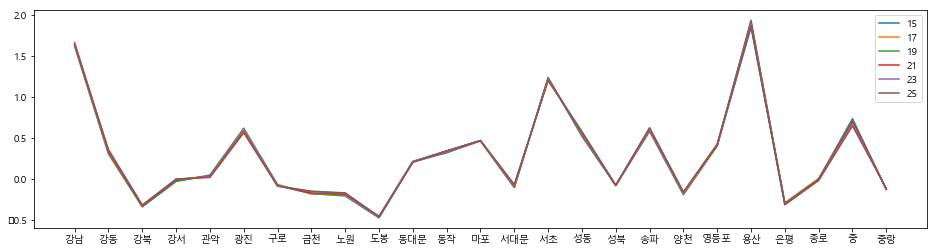

In [35]:
plt.figure(figsize=(16,4))
sortList = []
for i in range(len(k_list)):
    knn_fit = neg.KNeighborsRegressor(n_neighbors=k_list[i], p=2, metric='minkowski')
    knn_fit.fit(X, y_scale)
    knn_fit.fit(X_apt, y_apt_scale)
    knn_fit.fit(X_town, y_town_scale)
    x_test["predK%i" %k_list[i]] = knn_fit.predict(x_test.iloc[:, 14:16])
    mean = x_test.groupby(['Gue'], as_index=False).mean()
    price_pred = pd.DataFrame(mean.iloc[:, -1])
    price_pred.index = mean['Gue']
    sortList.append(price_pred)
    plt.plot(price_pred)
plt.legend(k_list)
plt.rcParams['axes.grid'] = True
plt.show()
# K=25로 결정 #

In [36]:
## 결과물 저장 ##
#x_test.to_csv("d:/project_data/KNN_data.csv", encoding='euc-kr', index=False)
x_test.iloc[:,:19].head()

,Seoul,Gue,Name,Type,Open,Code,Add,Room,Howbig,Playground,Worker,Max,Now,When,X,Y,old_add,201809,소득추정
1,서울특별시,송파,가락복지관어린이집,국공립,정상,5698,양재대로 897,4,220,1,12,70,57,1996-03-23,127.106891,37.495573,가락1동,37,0.780184
9,서울특별시,송파,개롱어린이집,국공립,정상,5820,동남로 225,3,74,1,8,28,28,2009-03-27,127.132103,37.498157,가락2동,1546,0.194990
23,서울특별시,송파,은송어린이집,국공립,정상,5827,동남로9길 17-10,8,331,2,19,123,114,2013-12-30,127.126273,37.493807,가락2동,1546,0.572981
34,서울특별시,송파,온새미어린이집,국공립,정상,5707,송이로 88,3,110,0,7,20,19,2018-03-02,127.119051,37.499160,가락본동,1190,0.103571
41,서울특별시,송파,가락본동어린이집,국공립,정상,5703,송이로17길 46,8,354,1,24,131,125,2010-01-19,127.124628,37.501013,가락본동,1190,1.395961


#### **RNN LSTM**

##### [RNN LSTM: 2021년 동별 인구 예측]

In [37]:
### prop predict RNN-LSTM ###
## tensor board ##
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.contrib import rnn

tf.set_random_seed(777)
tf.reset_default_graph()

In [38]:
time = ["%i"%(i) + "-%i"%(3) for i in range(2010, 2022)]

## parameter ##
seq_length = 5 # 데이터의 시퀀스 length (연관된 데이터)  -> output row
data_dim = 1 # 입력 차원 --> 인구수 1 (동별)
output_dim = 1 # 출력 차원 --> 예측치 1
#hidden_size = 30 # 셀 연산 후 나오는 output col
learning_rate = 0.07
iteration = 8000
m = 105 # --> None
MSE_list = []
pop_2103 = []
# training parameter #
predict_list = []
is_training = True
l2norm = 0.0001

In [39]:
### 데이터 전처리 ###
all_data = pd.read_csv("d:/project_data/peopleDataAll01.csv", sep=",", encoding='cp949')

###### RNN_LSTM: Train-Test(모델 test)

In [40]:
for k in [-18]: # 모든 동 별 for문으로 modeling --> 예시는 하나
    tf.reset_default_graph()
    keep_prob = tf.placeholder(dtype=tf.float32)
    test1 = all_data.iloc[:, [k]] # shape(105,1) m = 105
    # train scaling #
    mm1 = StandardScaler()
    test1 = mm1.fit_transform(test1)
    
    ## split ## --> 시계열(시간순)
    train_size = int(len(test1) * 0.8)
    train_set = test1[:train_size, :] # shape(512, 5)
    test_set = test1[train_size:, :] # test(220, 5)

In [41]:
    # RNN data building #
    def build(time_series, seq_length):
        x_data = []
        y_data = []
        for i in range(0, len(time_series) - seq_length):
            x_tmp = time_series[i: i + seq_length, :]
            y_tmp = time_series[i + seq_length, [-1]]
            x_data.append(x_tmp)
            y_data.append(y_tmp)
        return np.array(x_data), np.array(y_data)
    x_train, y_train = build(train_set, seq_length)
    x_test, y_test = build(test_set, seq_length)
    predict_x = test_set[-seq_length:].reshape(1, seq_length, 1)

In [42]:
    ## RNN building ##
    # cell #
    def lstm_cell(hidden_size):
        cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_size, activation=tf.tanh)
        return cell
    # drop-out / multi-cell #
    cell1 = rnn.DropoutWrapper(lstm_cell(15), input_keep_prob=keep_prob, output_keep_prob=keep_prob, seed=77)
    cell2 = rnn.DropoutWrapper(lstm_cell(10), input_keep_prob=keep_prob, output_keep_prob=keep_prob, seed=77)
    cell = rnn.MultiRNNCell([cell1, cell2], state_is_tuple=True) # dropout cell 5개

In [43]:
    X = tf.placeholder(dtype=tf.float32, shape=[None, seq_length, data_dim])
    y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

    # 초기화 #
    output, _state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32) 
    Y_pred = tf.contrib.layers.fully_connected(output[:, -1], output_dim, activation_fn=None) # last cell output --> 15일 뒤

In [44]:
    # 신경망 모델 구성 # --> 2층 구조 / xavier init / dropout / l2 reg / batch normalization
    init = tf.contrib.layers.xavier_initializer(seed=77)
    W1 = tf.Variable(init([1, 100]), name='weight1')
    b1 = tf.Variable(init([100]), name='bias1')
    layer1 = tf.matmul(Y_pred, W1) + b1
    l1 = tf.contrib.layers.batch_norm(layer1, center=True, scale=True,
                                      is_training=is_training)
    L1 = tf.nn.relu(l1, name='relu1')
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
    
    W2 = tf.Variable(init([100, 1]), name='weight2')
    b2 = tf.Variable(init([1]), name='bias2')
    hypothesis = tf.matmul(L1, W2) + b2
    
    ## tf.trainable --> l2 norm ##
    var = tf.trainable_variables()
    l2reg = tf.add_n([tf.nn.l2_loss(v) for v in var if 'bias' not in v.name]) * l2norm
    
    # cost #
    cost = tf.reduce_mean(tf.square(Y_pred - y)) # sum of sq --> 수치 예측이기 때문에 sq loss가 필요 없다.
    opt = tf.train.AdamOptimizer(learning_rate=learning_rate)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS) # batch_norm
    with tf.control_dependencies(update_ops):
        train = opt.minimize(cost)
    
    # MSE # --> mean squared error
    targets= tf.placeholder(tf.float32, [None, 1])
    predicts = tf.placeholder(tf.float32, [None, 1])
    MSE = tf.sqrt(tf.reduce_mean(tf.square(predicts - targets)))  

In [45]:
    ## session ##
    # training #
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
    sess.run(tf.global_variables_initializer())
    for i in range(iteration):
        cost_val, _, out= sess.run([cost, train, output], feed_dict={X: x_train, y: y_train, keep_prob:0.8})
#         if i % 1000 == 0:
#             print(cost_val)
    # predict #
    is_training = False
    y_hat_train = sess.run(Y_pred, feed_dict={X: x_train, keep_prob:1.0})
    y_hat = sess.run(Y_pred, feed_dict={X: x_test, keep_prob:1.0})
#     y_hat = mm1.inverse_transform(y_hat)
#     y_test = mm1.inverse_transform(y_test)
    RMSE_train = sess.run(MSE, feed_dict={targets: y_train, predicts: y_hat_train, keep_prob:1.0})
    RMSE = sess.run(MSE, feed_dict={targets: y_test, predicts: y_hat, keep_prob:1.0})
    print("RMSE_train: ", RMSE_train)
    print("RMSE: ", RMSE)
    predict_hat = sess.run(Y_pred, feed_dict={X: predict_x, keep_prob:1.0})

RMSE_train:  0.24399333
RMSE:  0.6919759


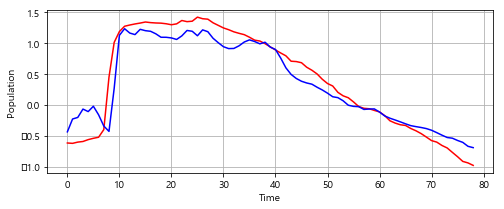

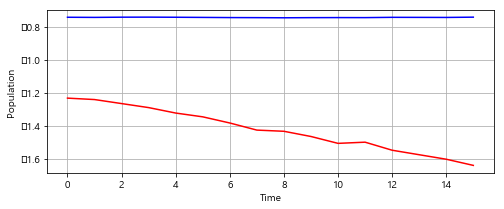

In [46]:
    # 시각화 #
    MSE_list.append(RMSE)
    predict_list.append(mm1.inverse_transform(predict_hat)[0,0])
    plt.figure(figsize=(8,3))
    plt.plot(y_train, 'r-')
    plt.plot(y_hat_train, 'b-')
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.show()
    plt.figure(figsize=(8,3))
    plt.plot(y_test, 'r-')
    plt.plot(y_hat, 'b-')
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.show()
    sess.close()

###### RNN_LSTM: Predict modeling

In [47]:
## LSTM Prediction ## --> 모든 데이터를 train으로 활용 후, predict *학습데이터의 수가 적기 때문
for k in [-18]: # -> 454개의 동 별 모두 for문으로 완성.
    tf.reset_default_graph()
    test1 = all_data.iloc[:, [k]] # shape(105,1) m = 105
    keep_prob = tf.placeholder(tf.float32)
    
    # train scaling #
    mm1 = StandardScaler()
    test1 = mm1.fit_transform(test1)

In [48]:
    # RNN data building #
    def build(time_series, seq_length):
        x_data = []
        y_data = []
        for i in range(0, len(time_series) - seq_length):
            x_tmp = time_series[i: i + seq_length, :]
            y_tmp = time_series[i + seq_length, [-1]]
            x_data.append(x_tmp)
            y_data.append(y_tmp)
        return np.array(x_data), np.array(y_data)    
    x_train, y_train = build(test1, seq_length)
    predict_x = test1[-seq_length*2+1:-seq_length+1].reshape(1, seq_length, 1)

In [49]:
    ## RNN building ##
    # cell #
    def lstm_cell(hidden_size):
        cell = tf.nn.rnn_cell.LSTMCell(num_units=hidden_size, activation=tf.tanh)
        return cell 
    cell1 = rnn.DropoutWrapper(lstm_cell(15), input_keep_prob=keep_prob, output_keep_prob=keep_prob, seed=77)
    cell2 = rnn.DropoutWrapper(lstm_cell(10), input_keep_prob=keep_prob, output_keep_prob=keep_prob, seed=77)
    # tensor board를 위한 list #
    cells = []
    cells.append(cell1)
    cells.append(cell2)
    cell = rnn.MultiRNNCell([cell1, cell2], state_is_tuple=True) # dropout cell 5개

In [50]:
    ## tensor board ##
    for one_lstm_cell in cells:
        one_kernel = one_lstm_cell.variables
        tf.summary.histogram("Kernel", one_kernel)

In [51]:
    ## 초기화 #
    X = tf.placeholder(dtype=tf.float32, shape=[None, seq_length, data_dim])
    y = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    output, _state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32) 
    Y_pred = tf.contrib.layers.fully_connected(output[:, -1], output_dim, activation_fn=None) # last cell output --> 15일 뒤
    
    # cost #
    cost = tf.reduce_sum(tf.square(Y_pred - y)) # sum of sq --> 수치 예측이기 때문에 sq loss가 필요 없다.
    opt = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train = opt.minimize(cost)
    
    # MSE # --> mean squared error
    targets= tf.placeholder(tf.float32, [None, 1])
    predicts = tf.placeholder(tf.float32, [None, 1])
    MSE = tf.sqrt(tf.reduce_mean(tf.square(predicts - targets)))
    summary_op = tf.summary.merge_all()

In [52]:
    ## session ##
    # training#
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    train_writer = tf.summary.FileWriter("d:/project_data/logdir/", graph=tf.get_default_graph())
    for i in range(iteration):
        cost_val, _, out, step_summary= sess.run([cost, train, output, summary_op], feed_dict={X: x_train, y: y_train, keep_prob: 0.7})
#        if i % 100 == 0: print(cost_val)
        train_writer.add_summary(step_summary)

    # predict # --> 201809 30개월 후 --> 202103
    for t in range(30):
        tmp_arr = sess.run(Y_pred, feed_dict={X: predict_x, keep_prob: 1.0})
        test1 = np.concatenate((test1, tmp_arr))
        predict_x = np.concatenate((predict_x[:, 1:, :], tmp_arr.reshape(1,1,1)), axis=1)
    sess.close()

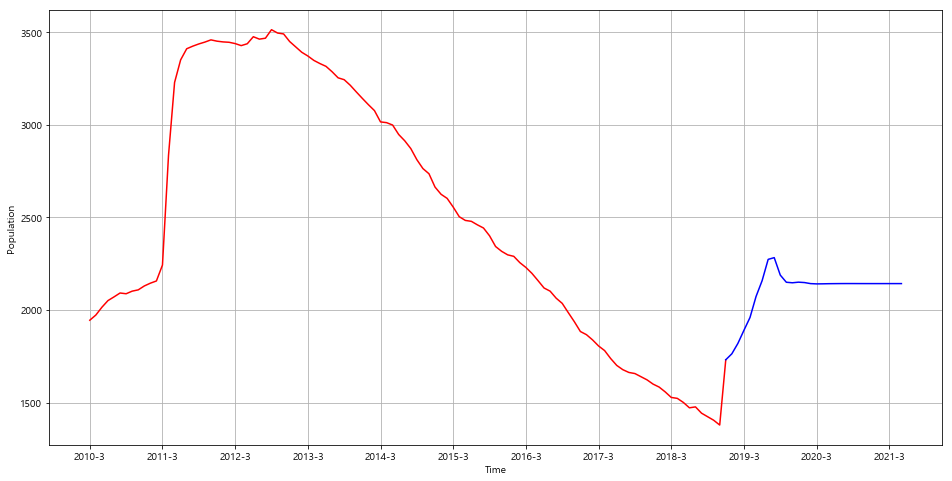

In [53]:
## 시각화 ##   
    if k % 1 == 0:
        data_concat = mm1.inverse_transform(test1)
        data_concat = pd.DataFrame(data_concat)
        plt.figure(figsize=(16,8))
        plt.plot(data_concat.iloc[:106, :], 'r-')
        plt.plot(data_concat.iloc[105:, :].index, data_concat.iloc[105:, :], 'b-')
        plt.xlabel("Time")
        plt.ylabel("Population")
        plt.xticks(ticks=np.arange(0, 135, 12), labels=list(time))
        plt.show()
    
    pop_2103.append(int(data_concat.iloc[-1][0]))

In [54]:
## 결과물 저장 ##
plist = pd.DataFrame(pop_2103).T
#plist.to_csv("d:/project_data/pop_2103.csv")
plist.head() # 2021년 3월 인구 예측

,0
0,2142


#### **K-means**

##### [K-means: 어린이집 클러스터 구성]

In [2]:
### k-means & 접근성 분석 ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist

np.random.seed(777)

In [3]:
## 어린이집 데이터 전처리 ##
all_center = pd.read_csv("d:/project_data/test/all_test_1.csv", sep=",", encoding="euc-kr")
x_test = all_center[all_center['Type'] == "국공립"] # 국공립만 선택
X = x_test.iloc[:-15, 15:17]
X_test = x_test.iloc[:, 15:17]

In [57]:
## k-means ## 최적 클러스터 k 찾기 -> elbow graph
K = 150

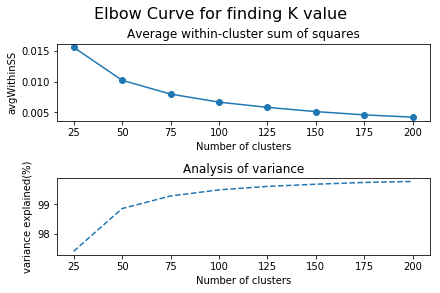

In [4]:
def k_search():
    ## 최적의 k를 엘보 그래프로 찾는 함수 ##
    K = [25, 50, 75, 100, 125, 150, 175, 200]
    KM = [KMeans(n_clusters=k).fit(X) for k in K] # 각각의 k(25~300까지 5단위), k-means 명령어
    ss = [silhouette_score(X, k.labels_, metric='euclidean') for k in KM]
    centroids = [k.cluster_centers_ for k in KM] # 각 k-means마다 클러스터별 center 거리
    D_k = [cdist(X, centrds, 'euclidean') for centrds in centroids] # 센터와 X데이터간의 거리
    cIdx = [np.argmin(D, axis=1) for D in D_k] # 최소 거리
    dist = [np.min(D, axis=1) for D in D_k] # 최소 거리
    avgWithinSS = [sum(d) / X.shape[0] for d in dist] # 클러스터 내 제곱 평균 (sum of sq)
    wcss = [sum(d**2) for d in dist] # sq 계산
    tss = sum(pdist(X)**2 / X.shape[0]) # X각각의 거리 제곱 / m --> 평균
    bss = tss - wcss
    fig, axs = plt.subplots(2,1, constrained_layout=True)
    axs[0].plot(K, avgWithinSS, 'o-')
    axs[0].set_title('Average within-cluster sum of squares')
    axs[0].set_xlabel('Number of clusters')
    axs[0].set_ylabel('avgWithinSS')
    fig.suptitle('Elbow Curve for finding K value', fontsize=16)
    ## 분산 ## 
    axs[1].plot(K, bss/tss*100, '--')
    axs[1].set_title('Analysis of variance')
    axs[1].set_xlabel('Number of clusters')
    axs[1].set_ylabel('variance explained(%)')
    plt.show()
    return ss

ss = k_search() # k -- > 구별 25 / 100로 진행

![](https://github.com/cutz-j/BigData-project/blob/master/img/2.png?raw=true)

In [59]:
# n_cluster = 150, max_iter=3000 #
k_means = KMeans(n_clusters=K, max_iter=3000, random_state=77)
k_means.fit(X)
k_cluster = k_means.predict(X_test)
x_test['k_cluster'] = k_cluster

In [60]:
# 시각화 # --> GIS 이용 시각화

![K=150](https://github.com/cutz-j/BigData-project/blob/master/img/3.png?raw=true)

In [61]:
# 실루엣 스코어 --> 클러스터 밀집도 평가지수 (-1 ~ 1) --> 높을 수록 좋다.
ss = silhouette_score(X, k_means.labels_, metric='euclidean')
ss

0.40688712637587415

#### **시설 접근성 분석**

##### [K-means 클러스터를 이용, 센터의 접근성 분석]

![](https://github.com/cutz-j/BigData-project/blob/master/img/4.png?raw=true)

In [62]:
center = k_means.cluster_centers_ # 150개의 클러스터
center = pd.DataFrame(center)
groupby = x_test.sort_values(['k_cluster'])

In [63]:
def distance(a, b):
    ## 좌표계 사이의 거리를 km 계산으로 ## --> 위도 경도는 radian 형태이므로 --> 변경이 필요
    lon1, lat1 = a[0], a[1]
    lon2, lat2 = float("%.6f" %b[0]), float("%.6f" %b[1])
    R = 6378.137 #// radius of the earth in km
    dlat = (lat2 - lat1) * (np.pi / 180)
    dlon = (lon2 - lon1) * (np.pi / 180)
    a = np.sin((dlat/2))**2 + np.cos(lat1 * np.pi / 180) * np.cos(lat2 * np.pi / 180) * (np.sin(dlon/2))**2
    c = 2 * np.math.atan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

In [64]:
def center_access(center_col, pop):
    # 시설 접근성 수식 연산 함수 #
    global k_means, center, K, groupby
    groupby[center_col] = 0.01
    xy = np.array(groupby.iloc[:, 15:17])
    center_xy = np.array(center.iloc[:, 0:2])
    tmp = np.zeros_like(groupby[center_col])
    for j in range(len(groupby)):
        tmpList = []
        for i in range(len(center)):
            gb = groupby[groupby['k_cluster'] == i]
            e = np.int(np.mean(gb[pop]))
            dist = distance(xy[j], center_xy[i])
            tmpList.append(e * (dist*1000) ** -1)
        tmp[j] = np.sum(tmpList)
        groupby[center_col] = tmp

In [65]:
## 현재 인구 접근성 분석 ##
center_access('center_access', '201809')

#### **이용자 접근성 분석**

##### [K-means 클러스터, 시설 접근성 분석을 이용, 이용자(0~5세 인구, 어린이집 수요)의 접근성 분석]

![](https://github.com/cutz-j/BigData-project/blob/master/img/5.png?raw=true)

In [66]:
def people_access(people_col, center_col):
    global k_means, center, K, groupby
    center[people_col] = 0.01
    xy = np.array(groupby.iloc[:, 15:17])
    center_xy = np.array(center.iloc[:, 0:2])
    tmp = np.zeros_like(center[people_col])
    for j in range(len(center)):
#         if j % 100 == 0: print("people continue..")
        tmpList = []
        for i in range(len(groupby)):
            center_acc = groupby[center_col].iloc[i]
            limit = groupby['Max'].iloc[i]
            dist = distance(xy[i], center_xy[j])
            tmpList.append((limit * (dist*1000) ** -1) / (center_acc))
        tmp[j] = np.sum(tmpList)
    center[people_col] = tmp
    for i in range(len(groupby)):
        groupby[people_col].iloc[i] = center[people_col][groupby['k_cluster'].iloc[i]]

In [67]:
# 현재 인구 기반 이용자 접근성 분석 #
people_access('people_access', 'center_access')

![](https://github.com/cutz-j/BigData-project/blob/master/img/7.png?raw=true)

In [68]:
# 2021년 인구 예측 기반 시설 / 이용자 접근성 분석 #
center_access('center_access_2', '202104')
people_access('people_access_2', 'center_access_2')

In [74]:
## 결과 저장 ##
# groupby.to_csv("d:/project_data/test/test_1.csv", encoding="euc-kr", index=0)
groupby.head(3)

,Unnamed: 0,Seoul,Gue,Name,Type,Open,Code,Add,Room,Howbig,...,center_access,people_access,202104,center_access_2,people_access_2,income_cluster,center_cluster1,people_cluster1,center_cluster2,people_cluster2
731,731,서울특별시,강북,구립수유2동어린이집,국공립,정상,1044.0,삼양로138길 18,5,391,...,19.863370,0.430651,781,20.050892,0.426409,1,23,65,27,28
725,725,서울특별시,강북,구립우이한솔어린이집,국공립,정상,1014.0,4.19로13길 23-3,3,107,...,18.312067,0.430651,762,18.538925,0.426409,0,11,65,22,28
729,729,서울특별시,강북,구립오렌지어린이집,국공립,정상,1029.0,삼양로123길 10-21,5,152,...,19.504413,0.430651,762,19.708098,0.426409,1,11,65,22,28


### **데이터 심층분석**

#### **수치 랭킹**

In [70]:
### 동별 랭킹과 %를 구하는 모듈 ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [72]:
all_data = pd.read_csv("d:/project_data/test/test_11.csv", encoding='euc-kr')

# scaling #
mm = MinMaxScaler()
scale_m = mm.fit_transform(all_data.iloc[:, -5:])
summation = pd.DataFrame(np.mean(scale_m, axis=1))
data = pd.concat((all_data['Name'], all_data['old_add'], summation), axis=1)
mean = data.groupby(['old_add'], as_index=False).mean() # (4, 13, )
mean.columns = ['old_add', 'ranking']
mean = mean.sort_values(by=['ranking'])
mean['rank'] = mean.iloc[:,[-1]].rank() / len(mean) * 100

In [73]:
## 결과물 저장 ##
#mean.to_csv("d:/project_data/test/ranking.csv", encoding="euc-kr")
mean.head()

,old_add,ranking,rank
81,도봉제1동,0.031122,0.243902
82,도봉제2동,0.042752,0.487805
9,갈현제1동,0.052283,0.731707
168,상계1동,0.068671,0.975610
210,수궁동,0.071465,1.219512


#### **협업 필터링: 코사인 유사도**

In [71]:
## 코사인 유사도 기반 ##
## 최하 클러스터 유사 어린이집 찾기 ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [75]:
## 데이터 전처리 ##
all_data = pd.read_csv("d:/project_data/KK_k150_2021.csv", sep=",", encoding='cp949')

# 필요 데이터 벡터화 #
data = pd.concat((all_data['predK25'], all_data['center_access'], all_data['center_access_2'],
                                  all_data['people_access'], all_data['people_access_2']), axis=1)

data.index = all_data['Name'] # 인덱스 첨부

In [76]:
# scaling #
mm = MinMaxScaler()
data_scale = mm.fit_transform(data)
ana = cosine_similarity(data_scale)

In [77]:
# 소외 어린이집 별 groupby, sorting #
data_259 = pd.DataFrame(ana[259], index=all_data['Name'], columns=['봄빛'])
#data_259 = data_259.sort_values(by='봄빛', ascending=False)
data_261 = pd.DataFrame(ana[261], index=all_data['Name'], columns=['상일'])
#data_261 = data_261.sort_values(by='상일', ascending=False)
data_270 = pd.DataFrame(ana[270], index=all_data['Name'], columns=['한마을'])
#data_270 = data_270.sort_values(by='한마을', ascending=False)
data_824 = pd.DataFrame(ana[824], index=all_data['Name'], columns=['늘사랑'])
#data_824 = data_824.sort_values(by='늘사랑', ascending=False)
data_686 = pd.DataFrame(ana[686], index=all_data['Name'], columns=['노원'])
#data_686 = data_686.sort_values(by='노원', ascending=False)

cos_sim = pd.concat((data_259, data_261, data_270, data_824, data_686), axis=1)
cos_sim = cos_sim[cos_sim > 0.9]
cos_sim = cos_sim.dropna(axis=0)

#cos_sim.to_csv("d:/project_data/cos_sim.csv", encoding="cp949")
cos_sim.head()

,봄빛,상일,한마을,늘사랑,노원
Name,,,,,
구립해사랑어린이집,0.909752,0.913146,0.906583,0.931785,0.932481
해누리어린이집,0.909752,0.913146,0.906583,0.931785,0.932481
구로생명숲어린이집,0.900867,0.913337,0.900128,0.924340,0.925700
해랑어린이집,0.909752,0.913146,0.906583,0.931785,0.932481
연초롱어린이집,0.900621,0.913668,0.900185,0.922535,0.924022


#### **수치 별 클러스터링**

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [79]:
all_data = pd.read_csv("d:/project_data/test/test_1.csv", sep=",", encoding='cp949')

def income_cluster(col):
    ## 소득 분위 별 클러스터링 함수 ##
    quarter = range(25,101,25)
    k = 0
    p = np.min(col)
    for i in quarter:
        q = np.percentile(col, i)
        idx = all_data[all_data['predK25'] <= q][all_data['predK25'] > p].index
        for j in idx:
            all_data.iloc[j, -1] = k
        k += 1
        p = q

In [80]:
def center_cluster(all_data, colname, new_col):
    ## 시설접근성 분위 별 클러스터링 ##
    mean = all_data[colname].groupby(all_data['old_add']).mean()
    mean = mean.sort_values()
    for i in range(len(mean)):
        mean[i] = i
    for i in range(len(all_data)):
        all_data.iloc[i, -1] = int(mean[all_data['old_add'][i]])

In [81]:
def people_cluster(colname, new_col):
    ## 이용자 접근성 분위 별 클러스터링 ##
    global all_data
    sort = all_data[colname].sort_values().index
    k = 0
    j = all_data[colname][sort[0]]
    for i in sort:
        if all_data[colname][i] == j:
            all_data.iloc[i, -1] = k
        else:
            k += 1
            all_data.iloc[i, -1] = k
        j = all_data[colname][i]

In [119]:
all_data['income_cluster_test'] = 0
income_cluster(all_data['predK25'])
all_data['center_cluster1_test'] = 0
center_cluster(all_data, 'center_access', 'center_cluster1_test')
all_data['people_cluster1_test'] = 0
people_cluster('people_access', 'people_cluster1_test')
all_data['center_cluster2_test'] = 0
center_cluster(all_data, 'center_access_2', 'center_cluster2_test')
all_data['people_cluster2_test'] = 0
people_cluster('people_access_2', 'people_cluster2_test')

In [91]:
## 결과물 저장 ##
#all_data.to_csv("d:/project_data/test/test2(상계1동, 강일동).csv", encoding='cp949')
all_data.iloc[:, 15:31].head(3)

,X,Y,old_add,201809,predK25,k_cluster,center_access,people_access,202104,center_access_2,people_access_2,income_cluster,center_cluster1,people_cluster1,center_cluster2,people_cluster2
0,127.014887,37.649072,수유제2동,781,0.106201,0,19.863370,0.430651,781,20.050892,0.426409,1,23,65,27,28
1,127.007721,37.645110,우이동,770,-0.479180,0,18.312067,0.430651,762,18.538925,0.426409,0,11,65,22,28
2,127.014524,37.645681,우이동,770,-0.168261,0,19.504413,0.430651,762,19.708098,0.426409,1,11,65,22,28


### **심층분석에 따른 최적 입지 선정**

#### **유흥시설, 산업지역 및 그 외 기피지역을 제외한 지역을 선정**

![](https://github.com/cutz-j/BigData-project/blob/master/img/8.png?raw=true)

![](https://github.com/cutz-j/BigData-project/blob/master/img/9.png?raw=true)

![](https://github.com/cutz-j/BigData-project/blob/master/img/10.png?raw=true)

### **개선효과 분석**

In [121]:
## 어린이집과 어린이집 개수 충원을 가정한 후, 수치 입력 후 재 분석 ##

![](https://github.com/cutz-j/BigData-project/blob/master/img/11.png?raw=true)

![](https://github.com/cutz-j/BigData-project/blob/master/img/12.png?raw=true)

![](https://github.com/cutz-j/BigData-project/blob/master/img/13.png?raw=true)